In [1]:
from sklearn.metrics import classification_report
from sklearn import metrics
import pandas as pd
import statsmodels.api as sm

E="Excellent"
M="Medium"
T="Terrible"

# True values
x_true = [E,E,E,E,E,E,E,E,E,E, M,M,M,M,M,M,M,M,M,M, T,T,T,T,T,T,T,T,T,T]
# Predicted values
y_pred = [E,E,E,E,T,M,E,E,E,E, M,M,M,E,M,E,M,T,M,M, T,E,T,T,T,T,T,T,T,T]

# Print the Confusion Matrix
print(metrics.confusion_matrix(x_true, y_pred))

# Print the precision, recall, f1-score and accuracy
print(classification_report(x_true, y_pred, digits=3))

[[8 1 1]
 [2 7 1]
 [1 0 9]]
              precision    recall  f1-score   support

   Excellent      0.727     0.800     0.762        10
      Medium      0.875     0.700     0.778        10
    Terrible      0.818     0.900     0.857        10

    accuracy                          0.800        30
   macro avg      0.807     0.800     0.799        30
weighted avg      0.807     0.800     0.799        30



In [2]:
from sklearn.metrics import r2_score
y_true = [3, -2.5, 2, 8]
y_pred = [3, -2.5, 2, 8]

r2 = r2_score(y_true, y_pred)

print("Coefficient of determination: %.3f"%r2)

Coefficient of determination: 1.000


In [3]:
import numpy as np
y_mean = np.mean(y_true)
print("Oservation Mean value: %.3f"%y_mean)

Oservation Mean value: 2.625


In [4]:
y_true = [3, -2.5, 2, 8]
y_pred = [2.625, 2.625, 2.625, 2.625]

r2 = r2_score(y_true, y_pred)

print("Coefficient of determination: %.3f"%r2)

Coefficient of determination: 0.000


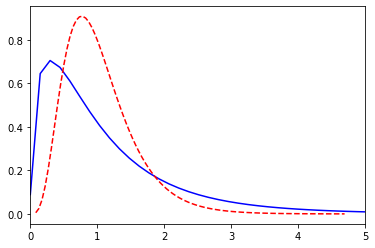

In [5]:
import numpy as np
from scipy.stats import f, norm
import matplotlib.pyplot as plt
%matplotlib inline

# first f
rv1 = f(dfn=3, dfd=15, loc=0, scale=1)
x = np.linspace(rv1.ppf(0.0001), rv1.ppf(0.9999), 100)
y = rv1.pdf(x) 

plt.xlim(0,5)
plt.plot(x,y, 'b-')

# second f 
rv2 = f(dfn=10, dfd=50, loc=0, scale=1)
x = np.linspace(rv2.ppf(0.0001), rv2.ppf(0.9999), 100)
y = rv2.pdf(x) 

plt.plot(x,y, 'r--')

In [6]:
df = pd.read_csv('http://gosmar.eu/ml/cats.csv', index_col=0) 
print(df.head(6))
print(len(df))

  Sex  Bwt   Hwt
1   M  2.0   6.5
2   M  2.0   6.5
3   M  2.1  10.1
4   M  2.2   7.2
5   M  2.2   7.6
6   M  2.2   7.9
97


In [7]:
#To_be_predicted
y = df.Hwt
#Intependent var
X = df.Bwt
#Add constant to better fit the linear model
X = sm.add_constant(X)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [8]:
model=sm.OLS(y, X)

In [9]:
model = model.fit()

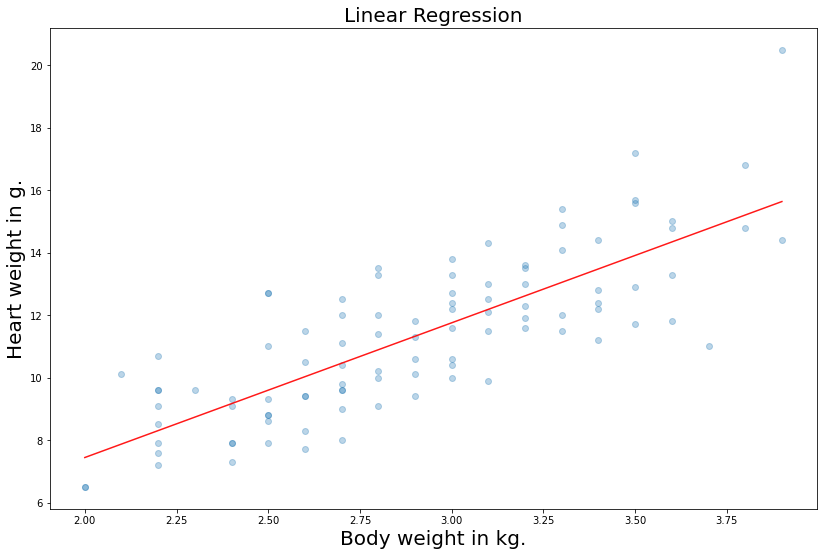

In [10]:
# Create the X array from the min to the max observations
X_obs = np.linspace(X.Bwt.min(), X.Bwt.max(), len(df))[:, np.newaxis]
X_obs = sm.add_constant(X_obs)
# Let's calculate the predicted values
y_pred = model.predict(X_obs)

fig = plt.figure()
fig.subplots_adjust(top=3.8, right = 1.9)
ax1 = fig.add_subplot(211)

plt.scatter(X.Bwt, y, alpha=0.3) # Plot the raw data
plt.title("Linear Regression", fontsize=20)
plt.xlabel("Body weight in kg.", fontsize=20)
plt.ylabel("Heart weight in g.", fontsize=20)
plt.plot(X_obs[:, 1], y_pred, 'r', alpha=0.9) # Add the regression line, colored in red

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Hwt   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     161.0
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           3.64e-22
Time:                        19:04:20   Log-Likelihood:                -179.56
No. Observations:                  97   AIC:                             363.1
Df Residuals:                      95   BIC:                             368.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1841      0.998     -1.186      0.239      -3.166       0.798
Bwt            4.3127      0.340     12.688      0.000       3.638       4.987
==============================================================================
Omnibus:                        3.229   Durbin-Watson:                   1.550
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                2.917
Skew:                           0.425   Prob(JB):                        0.233
Kurtosis:                       3.017   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model.params

const   -1.184088
Bwt      4.312679
dtype: float64

In [13]:
print(model.pvalues)

const    2.385334e-01
Bwt      3.639856e-22
dtype: float64


In [14]:
df = pd.read_csv('http://gosmar.eu/ml/putter.csv', index_col=0) 
print(df.head(6))
print(len(df))

   Length  Made
1    3.00     1
2    3.01     1
3    3.02     1
4    3.03     1
5    3.04     1
6    3.05     1
586


In [15]:
#To_be_predicted
y = df.Made
#Intependent var
X = df.Length

Text(0, 0.5, 'Hole Probability')

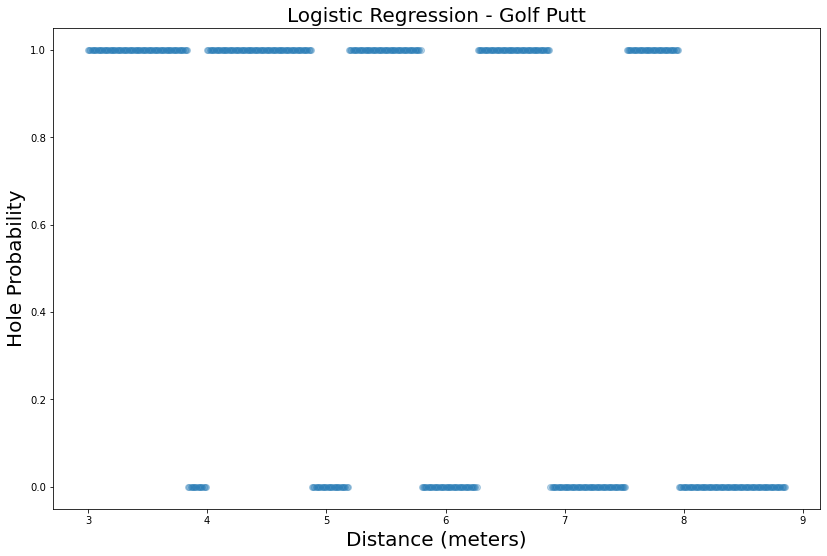

In [16]:
# Create the X array from the min to the max observations
X_obs = np.linspace(np.amin(X), np.amax(X), len(df))[:, np.newaxis]

fig = plt.figure()
fig.subplots_adjust(top=3.8, right = 1.9)
ax1 = fig.add_subplot(211)

plt.scatter(X_obs, y, alpha=0.3) # Plot the raw data
plt.title("Logistic Regression - Golf Putt", fontsize=20)
plt.xlabel("Distance (meters)", fontsize=20)
plt.ylabel("Hole Probability", fontsize=20)

#plt.plot(X_obs[:, 1], y_pred, 'r', alpha=0.9) # Add the regression line, colored in red

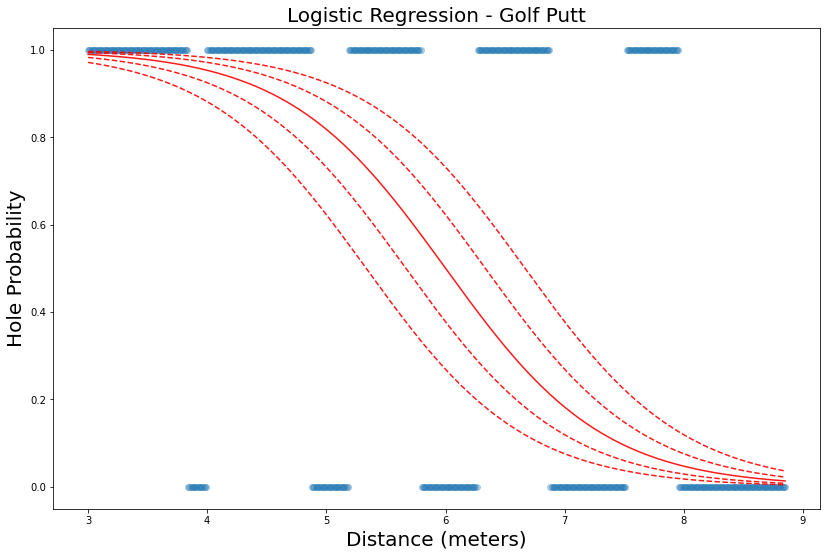

In [17]:
# Create the X array from the min to the max observations
X_obs = np.linspace(np.amin(X), np.amax(X), len(df))[:, np.newaxis]

fig = plt.figure()
fig.subplots_adjust(top=3.8, right = 1.9)
ax1 = fig.add_subplot(211)

plt.scatter(X_obs, y, alpha=0.3) # Plot the raw data
plt.title("Logistic Regression - Golf Putt", fontsize=20)
plt.xlabel("Distance (meters)", fontsize=20)
plt.ylabel("Hole Probability", fontsize=20)

z = 1 / (1 + np.exp((1.5*X_obs)-9))
plt.plot(X_obs, z, 'r', alpha=0.9) # Add the reverse Sigmoid function

z = 1 / (1 + np.exp((1.5*X_obs)-8.5))
plt.plot(X_obs, z, 'r--', alpha=0.9) # Add the reverse Sigmoid function

z = 1 / (1 + np.exp((1.5*X_obs)-9.5))
plt.plot(X_obs, z, 'r--', alpha=0.9) # Add the reverse Sigmoid function

z = 1 / (1 + np.exp((1.5*X_obs)-10))
plt.plot(X_obs, z, 'r--', alpha=0.9) # Add the reverse Sigmoid function

z = 1 / (1 + np.exp((1.5*X_obs)-8))
plt.plot(X_obs, z, 'r--', alpha=0.9) # Add the reverse Sigmoid function

In [18]:
#To_be_predicted
y = df.Made
#Intependent var
X = df.Length

print(X.shape[0])
print(y.shape[0])

586
586


In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
df = pd.read_csv('http://gosmar.eu/ml/email_features.csv') 
print(df.head(3))
print(len(df))

   NUM  SIZE  SPECIALS  Status
0  100     5         1       0
1  180     2         3       0
2  360    12         2       0
13


In [21]:
#Separate independent and target features
X=df.drop(['Status'], axis=1)
y=df['Status']

#Define the model
model = GaussianNB()

#Fitting
model.fit(X, y)

GaussianNB()

In [22]:
#Predict for NUM=800 chars, Size=15 MBytes, Special=8 chars

print("0: no-SPAM 1: SPAM")
print(model.predict([[800, 15, 8]]))

0: no-SPAM 1: SPAM
[1]


In [23]:
#Predict for NUM=150 chars, Size=8 MBytes, Special=3 chars

print("0: no-SPAM 1: SPAM")
print(model.predict([[250, 8, 3]]))

0: no-SPAM 1: SPAM
[0]


In [24]:
#Print the probabilities for each message: 
#col[0]=P(no-SPAM() 
#col[1]=P(SPAM)

print(model.predict_proba(X))

[[9.99777673e-01 2.22327129e-04]
 [9.99750459e-01 2.49541137e-04]
 [9.90058994e-01 9.94100579e-03]
 [9.99956620e-01 4.33802036e-05]
 [9.99900746e-01 9.92543807e-05]
 [9.99552450e-01 4.47550245e-04]
 [8.74543393e-01 1.25456607e-01]
 [1.66874816e-01 8.33125184e-01]
 [1.31465301e-05 9.99986853e-01]
 [3.06968203e-18 1.00000000e+00]
 [3.03372833e-75 1.00000000e+00]
 [1.05517503e-28 1.00000000e+00]
 [9.45793825e-46 1.00000000e+00]]


In [25]:
df = pd.read_csv('http://gosmar.eu/ml/nuclear.csv', index_col=0) 
print(df.head(6))
print(len(df))

     cost   date  t1  t2   cap  pr  ne  ct  bw  cum.n  pt
1  460.05  68.58  14  46   687   0   1   0   0     14   0
2  452.99  67.33  10  73  1065   0   0   1   0      1   0
3  443.22  67.33  10  85  1065   1   0   1   0      1   0
4  652.32  68.00  11  67  1065   0   1   1   0     12   0
5  642.23  68.00  11  78  1065   1   1   1   0     12   0
6  345.39  67.92  13  51   514   0   1   1   0      3   0
32


Text(0, 0.5, '')

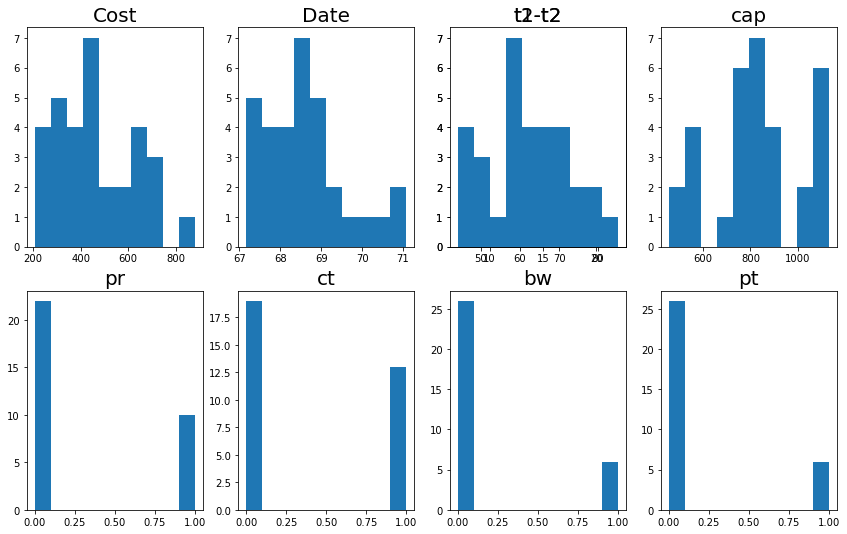

In [26]:
import matplotlib.pyplot as plt

#To_be_predicted
y = df.cost

# Create the X array from the min to the max observations
X_obs = np.linspace(1, 32, len(df))[:, np.newaxis]

fig = plt.figure()
fig.subplots_adjust(top=1.8, right = 2, hspace = 0.2)

ax1 = fig.add_subplot(241)
counts, bins = np.histogram(y)
plt.hist(bins[:-1], bins, weights=counts)
plt.title("Cost", fontsize=20)

ax2 = fig.add_subplot(242)
counts, bins = np.histogram(df.date)
plt.hist(bins[:-1], bins, weights=counts)
plt.title("Date", fontsize=20)

ax3 = fig.add_subplot(243)
counts, bins = np.histogram(df.t1)
plt.hist(bins[:-1], bins, weights=counts)
plt.title("t1-t2", fontsize=20)

ax4 = fig.add_subplot(243)
counts, bins = np.histogram(df.t2)
plt.hist(bins[:-1], bins, weights=counts)
plt.title("t2-t2", fontsize=20)

ax4 = fig.add_subplot(244)
counts, bins = np.histogram(df.cap)
plt.hist(bins[:-1], bins, weights=counts)
plt.title("cap", fontsize=20)

ax5 = fig.add_subplot(245)
counts, bins = np.histogram(df.pr)
plt.hist(bins[:-1], bins, weights=counts)
plt.title("pr", fontsize=20)

ax6 = fig.add_subplot(246)
counts, bins = np.histogram(df.ct)
plt.hist(bins[:-1], bins, weights=counts)
plt.title("ct", fontsize=20)

ax6 = fig.add_subplot(247)
counts, bins = np.histogram(df.bw)
plt.hist(bins[:-1], bins, weights=counts)
plt.title("bw", fontsize=20)

ax6 = fig.add_subplot(248)
counts, bins = np.histogram(df.pt)
plt.hist(bins[:-1], bins, weights=counts)
plt.title("pt", fontsize=20)

plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)

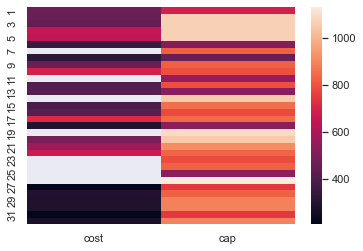

In [27]:
df = pd.read_csv('http://gosmar.eu/ml/nuclear2.csv', index_col=0) 
import seaborn as sns; sns.set()
X=df.drop(['pr','ne','ct','t1','t2','bw','pt','cum.n','date'], axis=1)
ax = sns.heatmap(X)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 1 to 32
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cost    24 non-null     float64
 1   date    29 non-null     float64
 2   t1      30 non-null     float64
 3   t2      27 non-null     float64
 4   cap     32 non-null     int64  
 5   pr      25 non-null     float64
 6   ne      27 non-null     float64
 7   ct      32 non-null     int64  
 8   bw      24 non-null     float64
 9   cum.n   32 non-null     int64  
 10  pt      30 non-null     float64
dtypes: float64(8), int64(3)
memory usage: 3.0 KB
None


<AxesSubplot:>

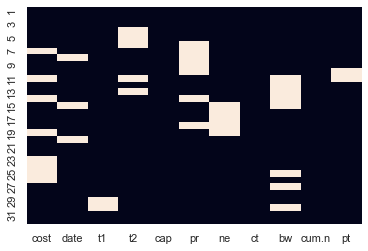

In [28]:
df = pd.read_csv('http://gosmar.eu/ml/nuclear2.csv', index_col=0) 
print(df.info())
import seaborn as sns; sns.set()
sns.heatmap(df.isnull(), cbar=False)

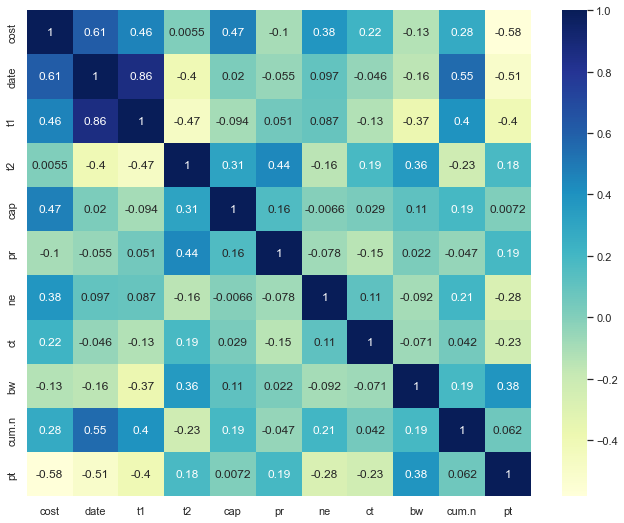

In [29]:
df = pd.read_csv('http://gosmar.eu/ml/nuclear.csv', index_col=0) 
import seaborn as sns; sns.set()
fig, ax = plt.subplots(figsize=(10,10))
fig.subplots_adjust(top=0.8, right = 1, hspace = 0.5)
ax = sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)